![image](img/5.1.2.png)

In [6]:
w = 5000 /12  # per-feet to per-inch
# setup
l = 6*12      # feet to inch
x = 24
# inertia
b = 6
h = 24
y = 4

from sympy import *
from sympy.physics.continuum_mechanics.beam import Beam
E, I = symbols('E, I')
R1, R2 = symbols('R1, R2')
bm = Beam(l, E, I)
bm.apply_load(R1, 0, -1)
bm.apply_load(w, 0, 0, end=l)
bm.apply_load(R2, l, -1)
# find reaction load at A, B
bm.bc_deflection = [(0, 0), (l, 0)]
bm.solve_for_reaction_loads(R1, R2)
bm.reaction_loads

{R1: -15000.0000000000, R2: -15000.0000000000}

In [7]:
# reverse direction
A,*_ = ( -x for x in bm.reaction_loads.values())
M = A*x - (w*x)*(x/2)
print(f"moment={M:.0f} inch-pound")

moment=240000 inch-pound


I=6912 inch^4
sigma=138.889 pound/inch^2


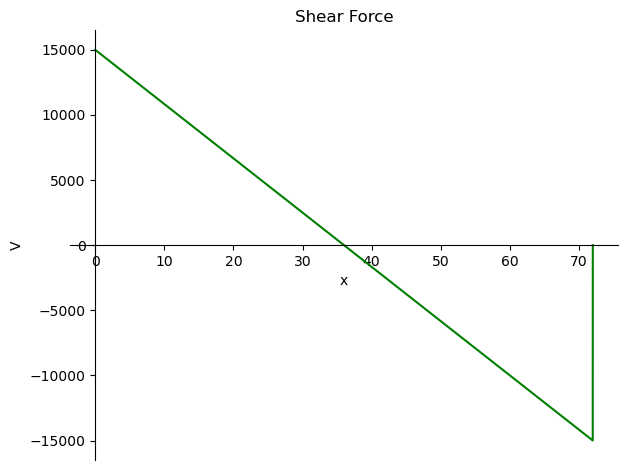

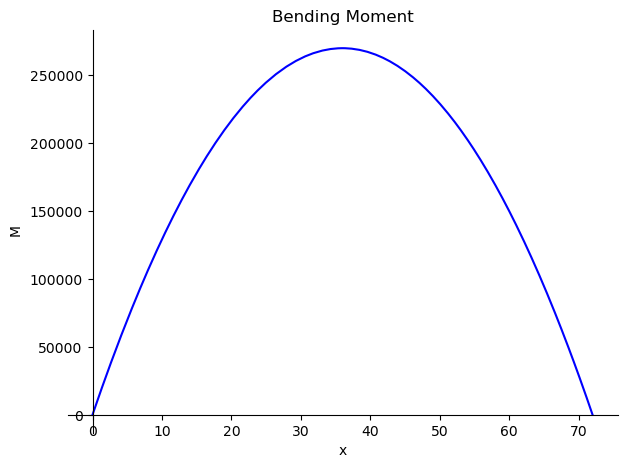

In [8]:
I = (1/12)*b*h**3
print(f"I={I:.0f} inch^4")
# sigma = my/I
sigma = M*y/I
print(f"sigma={sigma:.3f} pound/inch^2")
bm.plot_shear_force()  
bm.plot_bending_moment()